# Trabajo Práctico Nº2:
## *Modelo dinámico de un multirrotor de un grado de libertad*

$-$Profesores:

- Perez Paina, Gonzalo
- Gaydou, David
- Gonzalez Dondo, Diego

$-$Alumnos:

-   Cotos, Hugo
-   Gonzalez, Daniel
-   Irato, Mariano
-   Juarez, Daniel

$-$Curso: 6R1

# Modelo Analítico

Si la rotación del balancín se parametriza mediante una función que describe el ángulo instantáneo que forma el bastidor con la horizontal.
    
1.  Obtener las ecuaciones correspondientes a la cinemática de la
    rotación.

2.  Obtener las ecuaciones correspondientes a la dinámica de la
    rotación.

3.  Calcular el momento de inercia.

4.  Responder a las siguientes preguntas:

    1.  ¿Cuál considera que es la entrada del sistema?

    2.  ¿Cuál considera que es la salida del sistema?

    3.  ¿Cómo puede definir el torque?

    4.  ¿A qué se debe el torque que produce el cambio de actitud del balancín?

<div align="center">
  <img src="Imagenes/angulo_instantaneo.png", alt="Balancín", width="700"/>
  <br><b>Figura 1.</b> Multirrotor de un grado de libertad (balancín).
</div>
&nbsp;

# Respuestas

1.  $$w(t) = \theta_o '(t)$$ $$w'(t)=\frac{1}{J} \tau(t)$$

2.  $$\tau (t)= w' J$$

3.  $$J = \frac{\tau(t)}{w'(t)}$$

4.  1.  La entrada del sistema es el torque $\tau(t)$.

    2.  La salida es el ángulo instantáneo $\theta_o(t)$.

    3.  El torque, conocido como momento de fuerza, es una medida de la
        fuerza que puede causar un objeto a rotar alrededor de un eje.
        Se define como el producto vectorial de la distancia desde el
        eje de rotación al punto donde se aplica la fuerza y la fuerza
        aplicada. En el contexto de la dinámica rotacional, el torque se
        relaciona con el momento de inercia y la aceleración angular a
        través de la segunda ley de Newton para la rotación.

    4.  Al estar ambos extremos del balancín en equilibrio, ya que
        poseen la misma masa e igual distancia al eje, el torque que
        produce el cambio de actitud en el balancín se puede deber a
        fuerzas que se aplican externamente o a la misma fuerza que
        genera uno o ambos de los motores que tiene en sus extremos.

Donde:

-   w(t): velocidad angular

-   w'(t): aceleración angular

-   $\tau(t)$: torque

-   J: momento de inercia

# Lazo cerrado con compensador proporcional

1.  Transformar las ecuaciones de la dinámica de rotación al dominio de
    Laplace y obtener la función de transferencia a lazo abierto
    $G_{OL}(s) = \frac{\theta_o(s)}{T(s)}$.

2.  Suponiendo que se instala un trasductor ideal que mide la posición
    angular y se construye un sistema de lazo cerrado como el de la
    Figura [2](#fig:lazo-cerrado-pos-angular). Obtener la función de
    transferencia de lazo cerrado
    $G_{CL}(s) = \frac{\theta_o(s)}{\theta_r(s)}$.

3.  Calcular las raíces del polinomio característico. ¿Qué tipo de
    respuesta al escalón se espera que tenga el sistema de lazo cerrado?

4.  Utilizar el paquete de control de Python para graficar el lugar de
    raíces del sistema con los valores de K que la función asigne por
    defecto.

5.  Utilizar la función **feedback** para definir el modelo de lazo
    cerrado y graficar la respuesta al escalón mediante la función
    **step\_response**. Mostrar las gráficas para valores de K = 0,1; K
    = 1; K = 10.

6.  ¿Cuál es la frecuencia angular de la respuesta al escalón y cómo se
    puede verificar que las gráficas obtenidas son correctas?
    

<div align="center">
  <img src="Imagenes/bloques_lazo_cerrado_k.png", alt="Balancín", width="700"/>
  <br><b>Figura 2.</b> Lazo cerrado de posición angular.
</div>
&nbsp;

## Respuestas


1.  $$w(t) = \theta_o'(t) ----> W(s) = s\theta_o(s)$$
    $$w'(t)=\frac{1}{J} \tau(t)  ----> sW(s) = \frac{1}{J} \tau(s)$$

    $$s^2 \theta_o(s) = \frac{1}{J} \tau(s)$$

    $$G_{ol}(s) = \frac {\theta_o(s)}{T(s)} = \frac{1}{s^2 J}$$

2.  $$G(s) = K G_{ol}(s)$$

    $$\frac{\theta_o(s)}{\theta_r(s)} = \frac{G(s)}{1 + G(s)}$$

    $$\frac{\theta_o(s)}{\theta_r(s)} = \frac{\frac{K}{s^2 J}} {1 + \frac {K}{s^2 J}} = \frac{\frac {K}{J}}{s^2 + \frac {K}{J}}$$

    $$G_{cl}(s) = \frac{\frac{K}{J}} {s^2 + {\frac{K}{J}}}$$

3.  Como las raíces son imaginarias, el coeficiente de amortiguamiento
    es cero (no hay parte real), esto implica que el sistema es
    oscilante.

    $$\pm i \sqrt{\frac{K}{J}}$$

4. y 5. Utilizando el siguiente código en python, se grafica tanto el lugar de raíces como la respuesta al escalón para los tres valores de K.


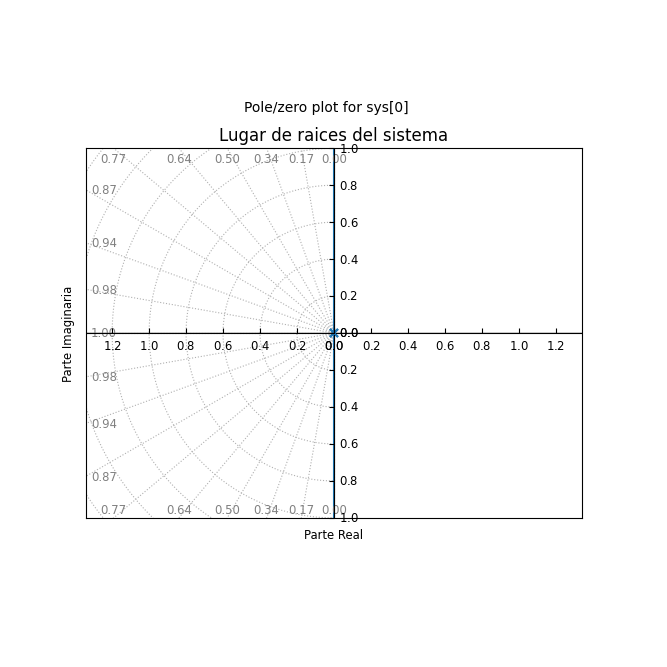

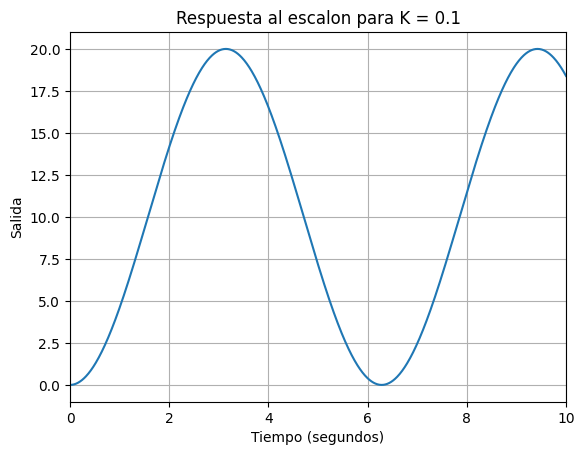

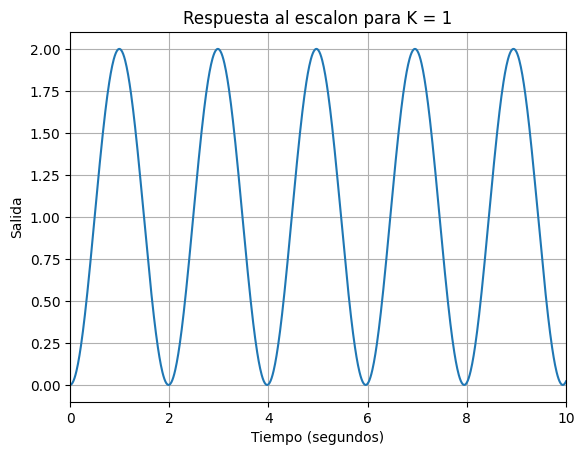

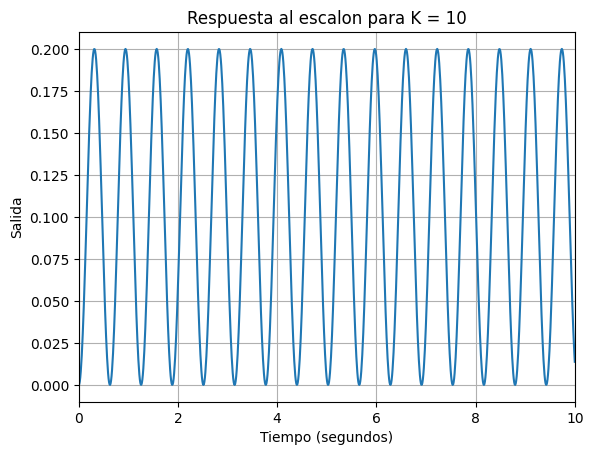

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir el rango de tiempo para la simulacion
t_end = 10  # Tiempo de simulacion
J = 0.1     # Momento de inercia

# Definir la funcion de transferencia del sistema sin realimentacion
num = [1]
den = [J, 0, 0]
sys = ctrl.TransferFunction(num, den)

# Graficar el lugar de raices del sistema
plt.figure()
ctrl.rlocus(sys)
plt.title('Lugar de raices del sistema')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)

# Definir los valores de K
k_values = [0.1, 1, 10]

t = np.linspace(0, t_end, 1000)  # Generar 1000 puntos entre 0 y 10 segundos

# Iterar sobre los diferentes valores de K y graficar la respuesta al escalon
for k in k_values:
    # Definir la funcion de transferencia del sistema en lazo cerrado con realimentacion
    sys_cl = ctrl.feedback(sys, k)

    # Obtener la respuesta al escalon en el rango de tiempo definido
    t_out, y_out = ctrl.step_response(sys_cl, T=t)

    # Crear una nueva figura para cada valor de K
    plt.figure()

    # Graficar la respuesta al escalon
    plt.plot(t_out, y_out)

    # Configurar la grafica
    plt.title(f'Respuesta al escalon para K = {k}')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Salida')
    plt.xlim([0, t_end])  # Establecer el limite del eje X a 10 segundos
    plt.grid(True)

plt.show()    

6.  Las gráficas obtenidas se pueden verificar, primero observando que
    la respuesta, en este caso, oscilatoria, como se había identificado
    en el punto 3. Por otro lado, la frecuencia angular para cada K es:

In [2]:
for k in k_values:
    frecuencia_angular = np.sqrt(k / J)
    print(f"Cuando la constante K es {k:.2f}, la frecuencia angular es {frecuencia_angular:.2f} rad/s")

Cuando la constante K es 0.10, la frecuencia angular es 1.00 rad/s
Cuando la constante K es 1.00, la frecuencia angular es 3.16 rad/s
Cuando la constante K es 10.00, la frecuencia angular es 10.00 rad/s


 El segundo punto a observar para verificar la gráfica es la frecuencia angular, por ejemplo, para k = 1, la frecuencia es:

In [3]:
print("f = {:.4f}".format(np.sqrt(1/J) / (2*np.pi)))

f = 0.5033


Este valor, es el mismo que se observa en la respuesta al escalón para K = 1.

# Lazo cerrado con compensador derivativo


1.  Obtener la función de transferencia de lazo cerrado.

2.  Calcular las raíces del polinomio característico con $K_p = 1$ y
    $T_d$ como parámetro. Calcular el valor de $T_d,crit$. ¿Qué tipo de
    respuesta al escalón se espera que tenga el sistema de lazo cerrado?

3.  Utilizar el paquete de control de Python para graficar el lugar de
    raíces del sistema con los valores de K que la función asigne por
    defecto para $T_d = 0,1$; $T_d = T_{d,crit}$ y $T_d = 2$.

4.  Utilizar la función **feedback** para definir el modelo de lazo
    cerrado y graficar la respuesta al escalón mediante la función
    **step\_response**. Mostrar las gráficas para valores de K = 0,1; K
    = 1; K = 10 usando para cada caso los valores de $T_d$ del inciso
    anterior.

5.  ¿Cuál es la diferencia fundamental respecto al comportamiento de la
    respuesta al incluir el término derivativo y por qué de dicho
    cambio?

![Compensador
derivativo](Imagenes/bloques_lazo_cerrado_pd.png)

# Respuestas


1.  $$G_{ol}(s) = \frac{1}{s^2J}$$
    $$G(s) = K_p \cdot (1 + T_ds) \cdot G_{ol}(s)$$
    $$\frac{\theta_o(s)}{\theta_r(s)} = \frac{G(s)}{1 + G(s)}$$
    $$\frac{\theta_o(s)}{\theta_r(s)} = \frac{K_p \cdot (1 + T_ds) \cdot G_{ol}(s)}{1 + K_p \cdot (1 + T_ds) \cdot G_{ol}(s)}$$
    $$\frac{\theta_o(s)}{\theta_r(s)} = \frac{K_p (1 + T_d s)}{s^2J + K_p(1 + T_d s)}$$

2.  El polinomio característico es: $$s^2J + K_p(1 + T_d s) = 0$$ Para
    $K_p = 1$: $$s^2J + T_d s + 1 = 0$$ Por lo tanto, las raíces son:
    $$s = \frac{-T_d \pm \sqrt{T_d^2 - 4J}}{2J}$$ El $T_{d,crit}$ se va
    a dar cuando $T_d$ sea cero: $$T_{d,crit} = 2\sqrt{J}$$ Como J es
    0.1, el valor de $T_{d,crit}$ es:

In [4]:
print("T_d,crit = {:.4f}" .format(2 * np.sqrt(0.1)))

T_d,crit = 0.6325


3. y 4. Utilizando el siguiente código en python, se grafica tanto el lugar de raíces como la respuesta al escalón para los tres valores de K y Td.

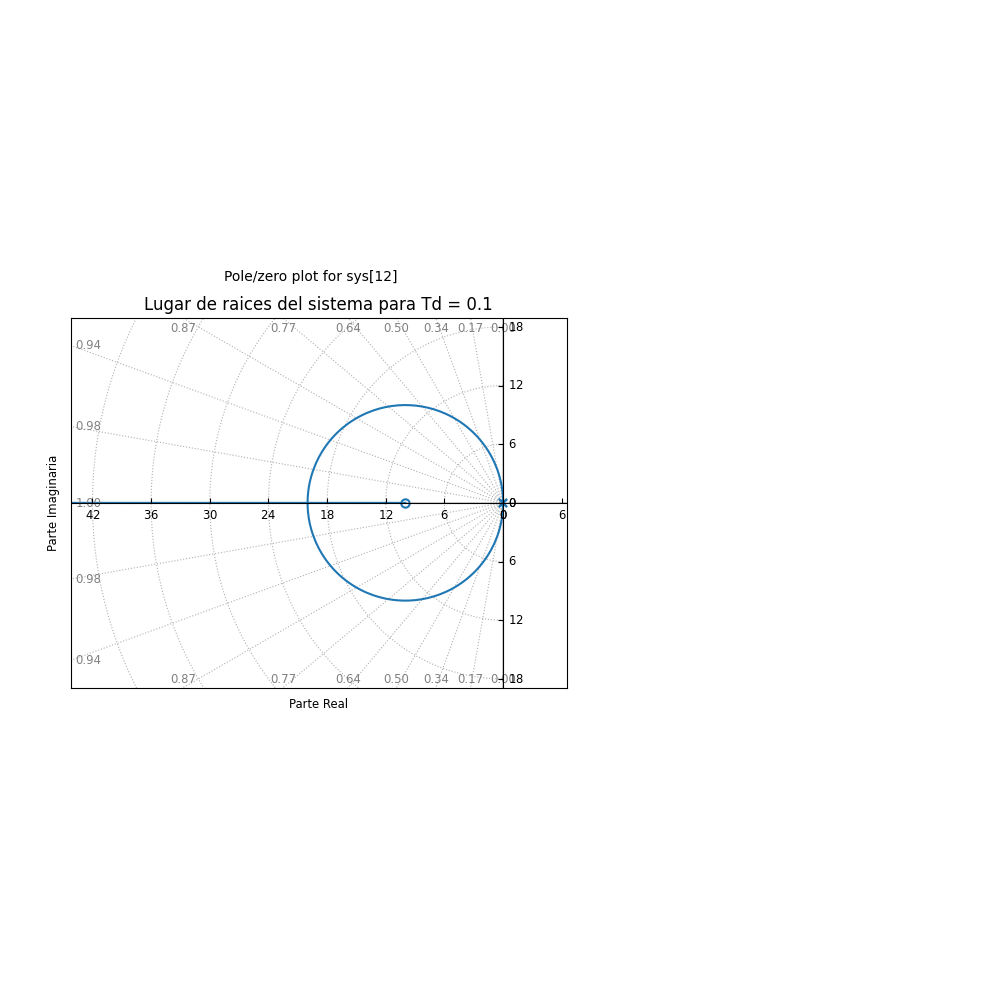

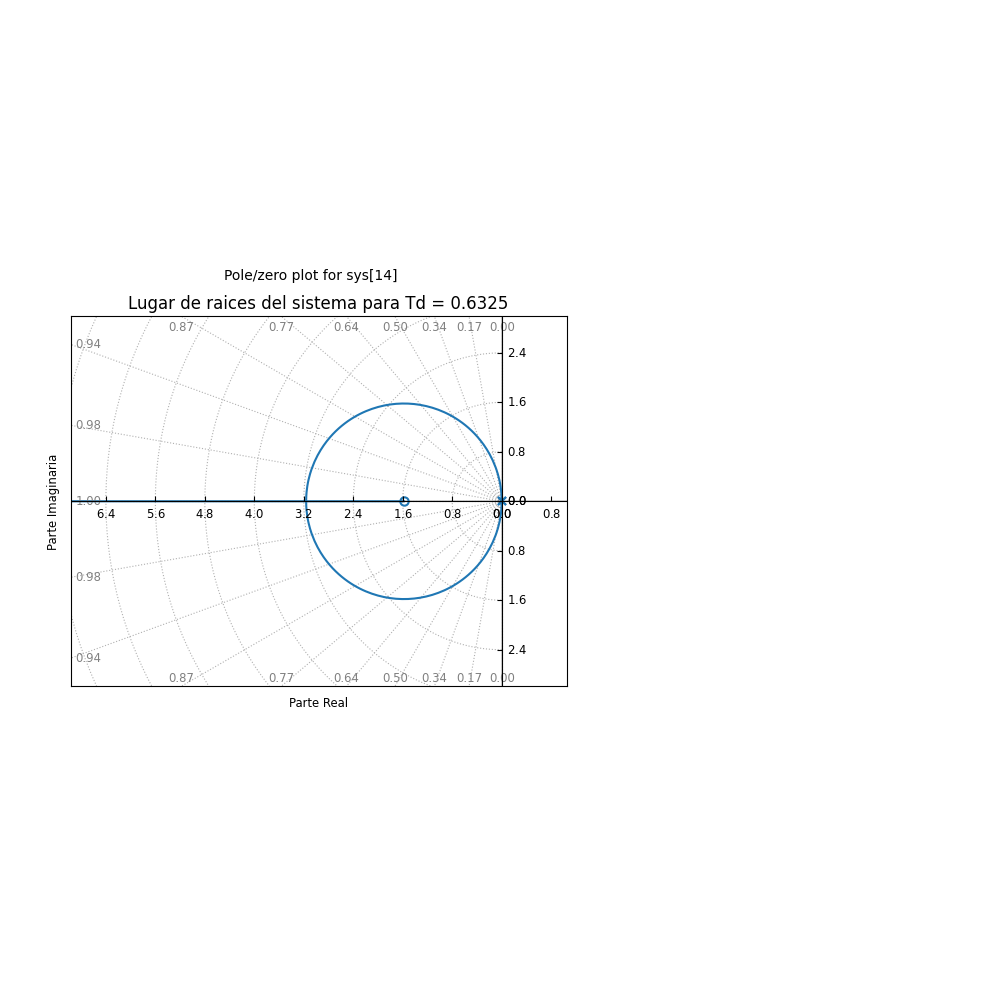

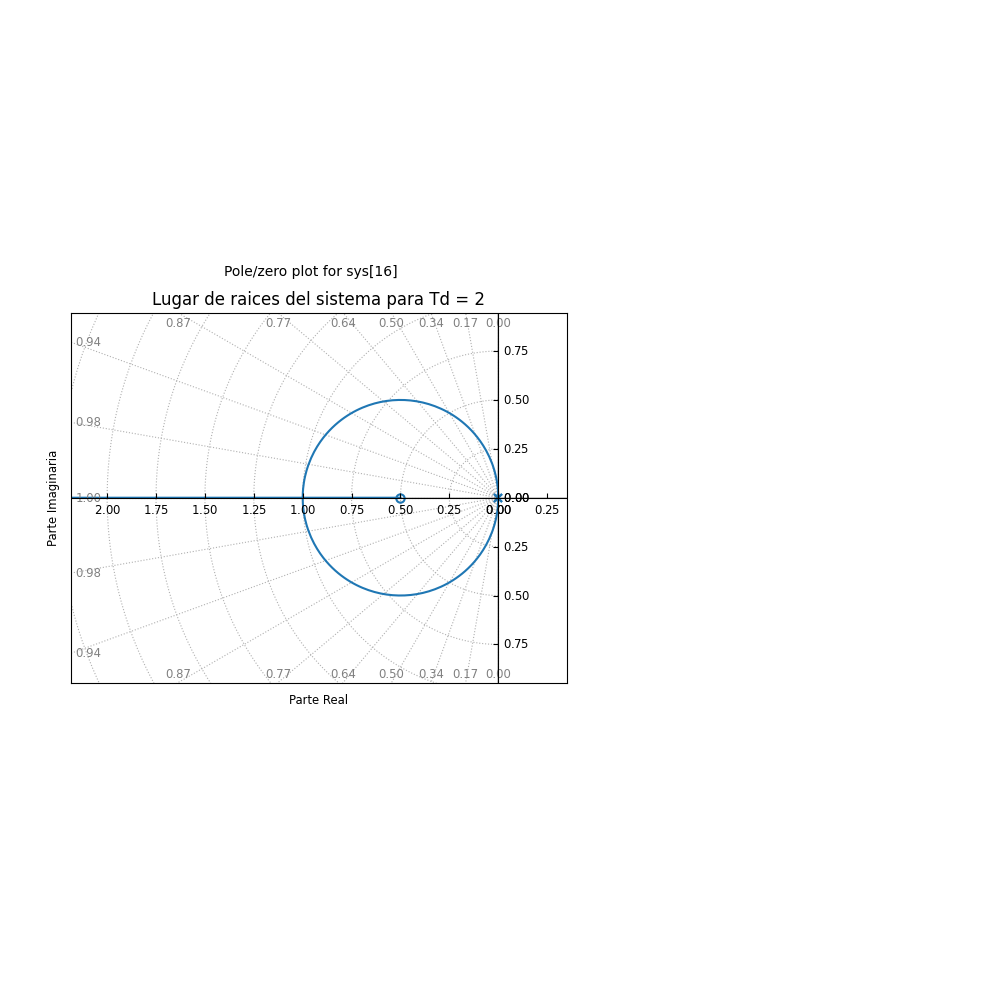

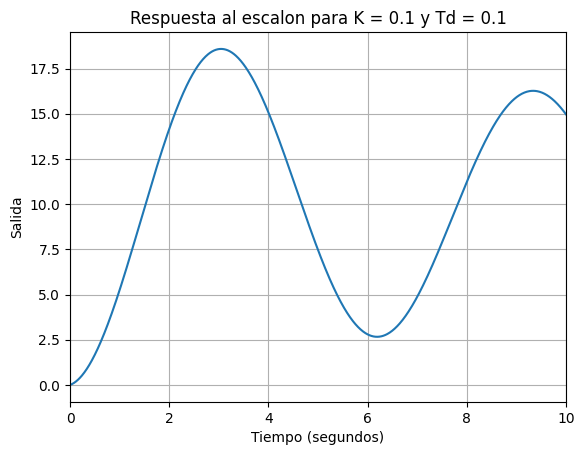

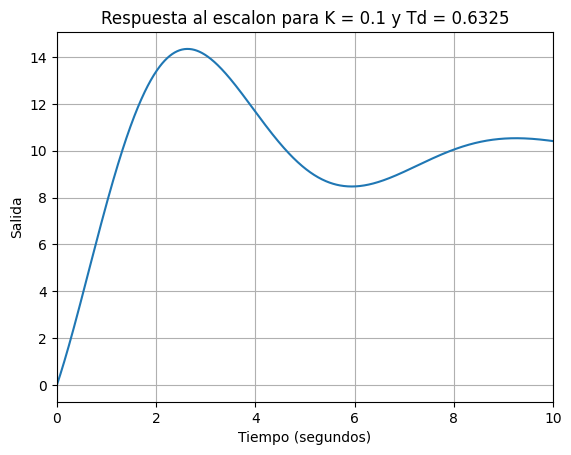

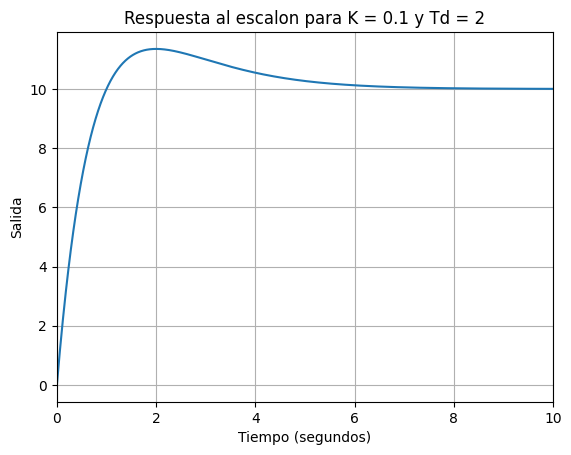

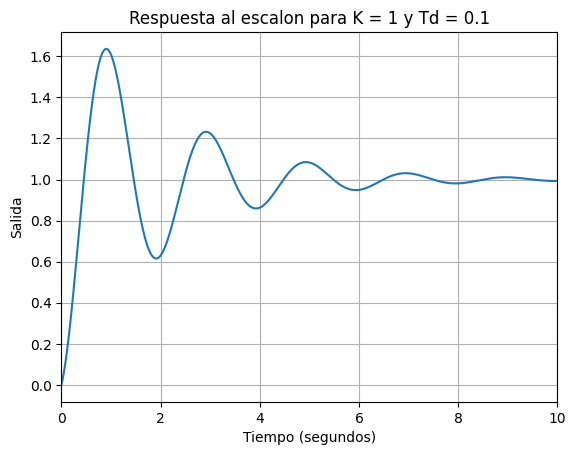

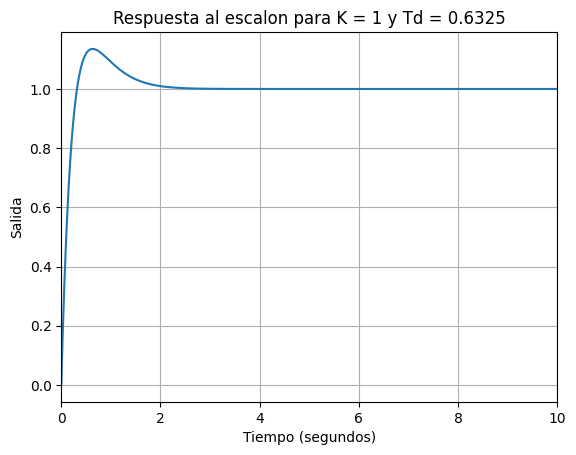

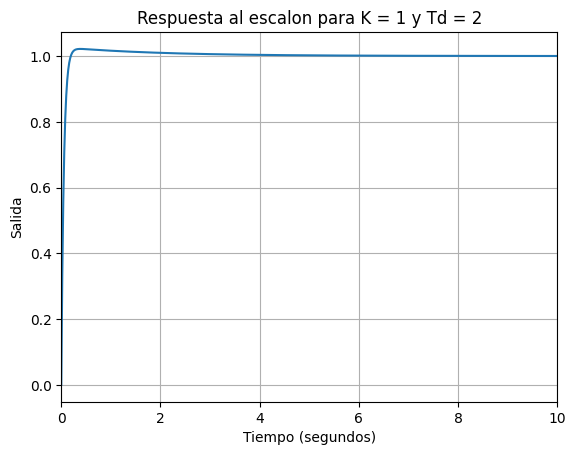

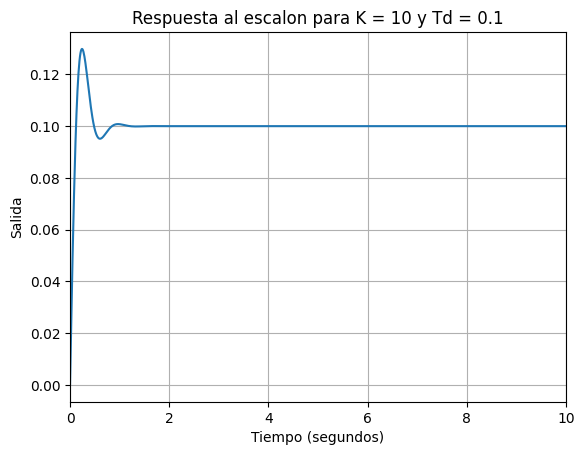

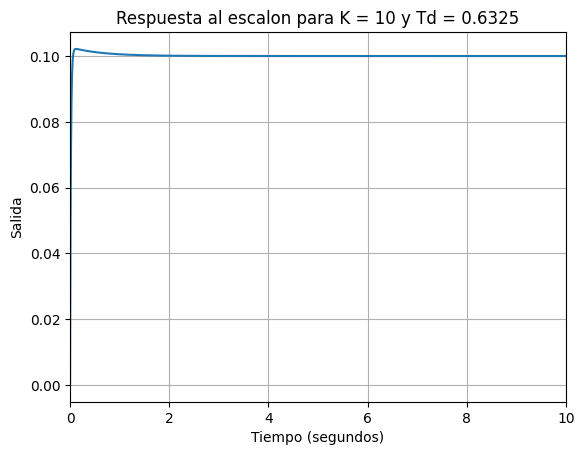

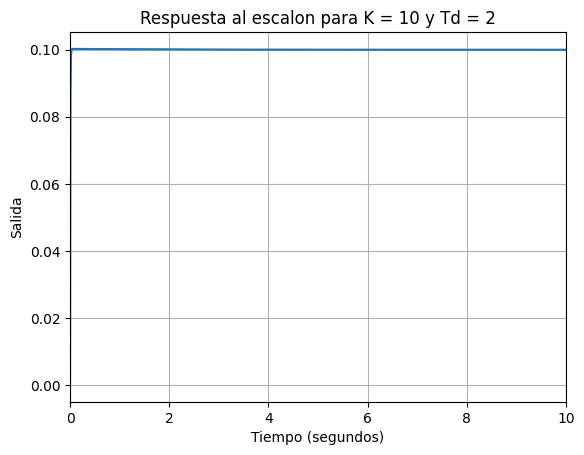

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir el rango de tiempo para la simulacion
t_end = 10  # Tiempo de simulacion
J = 0.1     # Momento de inercia
Kp = 1      # Constante de proporcionalidad
Td_critico = 0.6325

# Definir la funcion de transferencia del sistema sin realimentacion
num = [1]
den = [J, 0, 0]
G_ol = ctrl.TransferFunction(num, den)

Td_values = [0.1, Td_critico, 2]

# Definir los valores de K
Kp_values = [0.1, 1, 10]

# Generar 1000 puntos entre 0 y 10 segundos
t = np.linspace(0, t_end, 1000)

# Graficar el lugar de raices para los tres valores de Td
for i in range(len(Td_values)):
    Td = Td_values[i]

    compensador = ctrl.TransferFunction([Td, 1], [1])

    # Funcion de transferencia del bloque G_ol y el compensador derivativo
    G_combined = ctrl.series(G_ol, compensador)

    # Graficar el lugar de raices del sistema
    plt.figure()
    ctrl.root_locus(G_combined)
    plt.title(f'Lugar de raices del sistema para Td = {Td}')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.grid(True)

# Iterar sobre los diferentes valores de K y Td para graficar la respuesta al escalon
for i in range(len(Kp_values)):
    Kp = Kp_values[i]

    for j in range(len(Td_values)):
        Td = Td_values[j]

        compensador = ctrl.TransferFunction([Td, 1], [1])

        # Funcion de transferencia del bloque G_ol y el compensador derivativo
        G_combined = ctrl.series(G_ol, compensador)

        # Definir la funcion de transferencia del sistema en lazo cerrado con realimentacion
        G_cl = ctrl.feedback(G_combined, Kp)

        # Obtener la respuesta al escalon en el rango de tiempo definido
        t, y = ctrl.step_response(G_cl, T=t)

        # Crear una nueva figura para cada valor de K
        plt.figure()

        # Graficar la respuesta al escalon
        plt.plot(t, y)

        # Configurar la grafica
        plt.title(f'Respuesta al escalon para K = {Kp} y Td = {Td}')
        plt.xlabel('Tiempo (segundos)')
        plt.ylabel('Salida')
        plt.xlim([0, t_end])  # Establecer el limite del eje X a 10 segundos
        plt.grid(True)

plt.show()


5.  El término derivativo introduce un polo y un cero al sistema, esto hace que el sistema pase de oscilatorio a sub-amortiguado o sobre-amortiguado (dependiendo de K y $T_p$). Esto se debe a que ahora el sistema tiene raíces con parte real negativa, lo que genera un amortiguamiento en la señal.